### Edgar Moises Hernandez-Gonzalez
#### 06/11/19-19/11/19
#### Clasificar RAW con CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1000, 1))
x_test = x_test.reshape((n_samples_test, 22, 1000, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000, 1)
(288, 22, 1000, 1)


In [16]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,1000,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 20, 998, 32)       320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 499, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 497, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 248, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63488)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8126592   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 15s 53ms/sample - loss: 1.5393 - acc: 0.2396 - val_loss: 1.3863 - val_acc: 0.2465
Epoch 2/20
288/288 [==============================] - 15s 51ms/sample - loss: 1.3889 - acc: 0.2778 - val_loss: 1.3864 - val_acc: 0.2500
Epoch 3/20
288/288 [==============================] - 15s 51ms/sample - loss: 1.4107 - acc: 0.2326 - val_loss: 1.3864 - val_acc: 0.2500
Epoch 4/20
288/288 [==============================] - 15s 51ms/sample - loss: 1.3951 - acc: 0.2014 - val_loss: 1.3862 - val_acc: 0.2743
Epoch 5/20
288/288 [==============================] - 15s 53ms/sample - loss: 1.3887 - acc: 0.2361 - val_loss: 1.3859 - val_acc: 0.2569
Epoch 6/20
288/288 [==============================] - 15s 54ms/sample - loss: 1.3779 - acc: 0.3403 - val_loss: 1.3576 - val_acc: 0.2674
Epoch 7/20
288/288 [==============================] - 15s 51ms/sample - loss: 1.2389 - acc: 0.5243 - val_loss: 1.7386 - val_acc: 0.2674
Ep

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 2ms/sample - loss: 3.6447 - acc: 0.3715
Test loss: 3.644675996568468
Test accuracy: 0.3715278


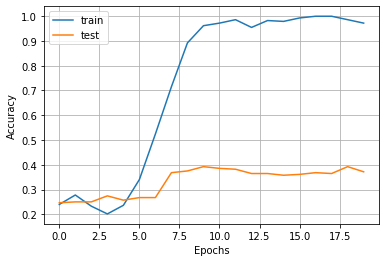

In [21]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

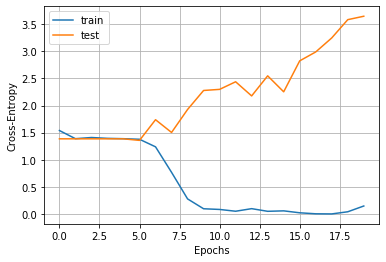

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.2407407407407407


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[32 18 17  5]
 [29 29  8  6]
 [ 8  9 29 26]
 [ 7  3 28 34]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.42      0.44      0.43        72
           1       0.49      0.40      0.44        72
           2       0.35      0.40      0.38        72
           3       0.48      0.47      0.48        72

   micro avg       0.43      0.43      0.43       288
   macro avg       0.44      0.43      0.43       288
weighted avg       0.44      0.43      0.43       288

